**<h1 align = "center">Toxic Comment Detection (two datasets) - Machine Learning</h1>**

**PROJECT PROBLEM STATEMENT IS:**

To build a model that will detect "Toxic and Non-Toxic Comments" in a combined datasets (Jigsaw and Youtube).

**METHODOLOGY:**

* Load and read the two datasets.
* Select "Comment" and "Toxic" columns from each of the datasets.
* Combine the new DataFrames.
* Process the texts in the "comment" column.
* Build a Neural Networ Model.
* Predict and Evaluate the model.
* Test model on new text data.

**PROJECT CONTENTS:**

1. **[INTRODUCTION](#1)**

    
2. **[INITIAL DATA ANALYSIS](#2)**
    * **2.1 [Loading Our Datasets](#3)**
    * **2.2 [Initial Analysis On Our Datasets](#4)**
    * **2.3 [Selecting The Required Columns](#5)**
    * **2.4 [Combining The Two Datasets](#6)**
    * **2.5 [Handling Duplicates](#7)**
    
    
3. **[VISUALIZATION](#8)**
    * **3.1 [Toxic vs Non-Toxic Comments Plot](#9)**
    * **3.2 [Wordcloud for Toxic Comments](#10)**
    * **3.3 [Wordcloud for Non-Toxic Comments](#11)**
    
    
4. **[EXPLORATORY DATA ANALYSIS (EDA)](#12)**
    * **4.1 [Replacing True and False Values](#13)**
    * **4.2 [Text Preprocessing](#14)**
    * **4.3 [Text Processing using TF-IDF](#15)**
    * **4.4 [Over-Sampling Using SMOTE](#16)**
    
    
5. **[MODELLING](#17)**
    * **5.1 [Splitting Our Dataset](#18)**
    * **5.2 [Building Neural Network Model](#19)**
    * **5.3 [Training Our Model](#20)**
    * **5.4 [Visualizing Our Model](#21)**
        * **5.4.1 [Model Accuracy](#22)**
        * **5.4.2 [Model Loss](#23)**
    * **5.5 [Model Accuracy Evaluation](#24)**
    * **5.6 [Saving Our Model and Vectorizer](#25)**
    * **5.7 [Testing Our Saved Model](#26)**
    
  
6. **[REPORTS](#27)**

## **INTRODUCTION**<a id="1"></a>

Posting comments in online discussions has become an important way to ex-
ercise one’s right to freedom of expression in the web. This essential right
is however under attack as a result of some individuals who hinder respectful reviews with their toxic comments. 
A toxic comment can be defined as a rude, dis-respectful, or unreasonable comment that is likely to make other users feel bad. It leaves a negative effect on the comment section.


In the following project, we will introduce a fine-grained neural network model for detecting toxic comments in online comments.

For our model, the input will be a comment column while toxic will be our target column.

### **INITIAL DATA ANALYSIS**<a id="2"></a>

#### **2.1 Loading Our Datasets**<a id="3"></a>

In [1]:
import pandas as pd
youtube_df = pd.read_csv("/kaggle/input/youtube-toxicity-data/youtoxic_english_1000.csv")
toxic_df = pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

#### **2.2 Initial Analysis On Our Datasets**<a id="4"></a>

In [2]:
youtube_df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
youtube_df.shape

(1000, 15)

In [4]:
toxic_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
toxic_df.shape

(159571, 8)

#### **2.3 Selecting The Required Columns**<a id="5"></a>

In [6]:
#We are going to select just the "comment_text" and "toxic" columns
toxic_df['Toxic'] = toxic_df.iloc[:, 2:].any(axis = 1)
selected_toxic_columns = toxic_df[['comment_text', 'Toxic']]
selected_toxic_columns

,comment_text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False
...,...,...
159566,""":::::And for the second time of asking, when ...",False
159567,You should be ashamed of yourself \n\nThat is ...,False
159568,"Spitzer \n\nUmm, theres no actual article for ...",False
159569,And it looks like it was actually you who put ...,False


In [7]:
#We are going to select just the "Text" and "IsToxic" columns
youtube_df['Toxic'] = youtube_df.iloc[:, 3:].any(axis = 1)
selected_youtube_columns = youtube_df[['Text', 'Toxic']].rename(
    columns = {
        'Text' : 'comment_text'
    }
)
selected_youtube_columns

,comment_text,Toxic
0,If only people would just take a step back and...,False
1,Law enforcement is not trained to shoot to app...,True
2,\nDont you reckon them 'black lives matter' ba...,True
3,There are a very large number of people who do...,False
4,"The Arab dude is absolutely right, he should h...",False
...,...,...
995,I remember that they sent in the national defe...,False
996,Stats don`t represent the problem. Race baitin...,True
997,The quote from the mother... Wow that hit hard...,False
998,this video is so racist,False


#### **2.4 Combining The Two Datasets**<a id="6"></a>

In [8]:
#Let's combine the two DataFrames
combined_df = pd.concat([selected_toxic_columns, selected_youtube_columns], ignore_index = True)
combined_df.head()

,comment_text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False


In [9]:
combined_df.shape

(160571, 2)

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160571 entries, 0 to 160570
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  160571 non-null  object
 1   Toxic         160571 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.4+ MB


In [11]:
combined_df.describe()

,comment_text,Toxic
count,160571,160571
unique,160568,2
top,run them over,False
freq,3,143884


In [12]:
combined_df.isnull().sum()

comment_text    0
Toxic           0
dtype: int64

#### **2.5 Handling Duplicates**<a id="7"></a>

In [13]:
#Checking duplicates
combined_df.duplicated(subset = ['comment_text'], keep = False).sum()

5

In [14]:
#Printing the duplicated rows
duplicates = combined_df[combined_df.duplicated(subset = ['comment_text'], keep = False)]
duplicates

,comment_text,Toxic
160163,RUN THEM OVER,True
160213,run them over,True
160228,run them over,True
160248,run them over,True
160270,RUN THEM OVER,True


In [15]:
#Dropping Duplicates
combined_df.drop_duplicates(subset = ['comment_text'], keep = 'first', inplace = True)

In [16]:
#Confirm Drops
combined_df.duplicated(subset = ['comment_text'], keep = False).sum()

0

In [17]:
combined_df['Toxic'].value_counts()

#We can see from the code above that the data is imbalanced.

Toxic
False    143884
True      16684
Name: count, dtype: int64

## **VISUALIZATION**<a id="8"></a>

#### **3.1 Toxic vs Non-Toxic Comments Plot**<a id="9"></a>

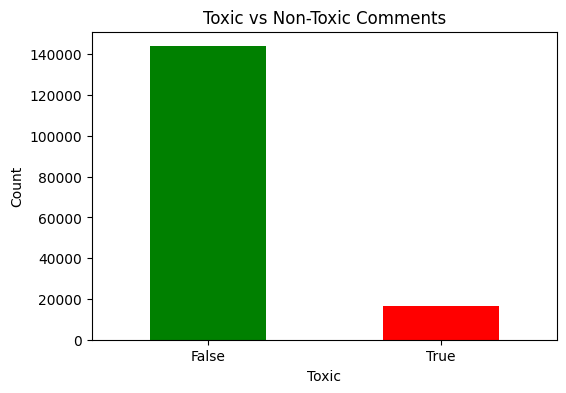

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
#Graphical representation of the Toxic column values (Toxic vs Non-Toxic Comments) distribution
plt.figure(figsize = (6, 4))
toxic_counts = combined_df['Toxic'].value_counts()
toxic_counts.plot(kind = 'bar', color = ['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

#### **3.2 Wordcloud for Toxic Comments**<a id="10"></a>

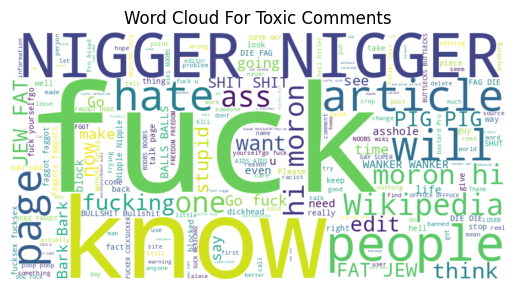

In [19]:
#"Wordcloud" is for creating word cloud visualization.
from wordcloud import WordCloud
#Creating Word Cloud of Toxic Comments
toxic_comments = ''.join(combined_df[combined_df['Toxic']]['comment_text'])
toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud For Toxic Comments")
plt.show()

#### **3.3 Wordcloud for Non-Toxic Comments**<a id="11"></a>

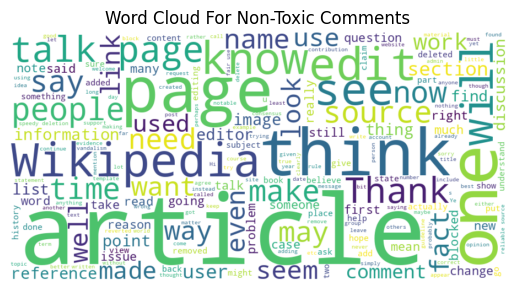

In [20]:
#Creating Word Cloud of Non-Toxic Comments
non_toxic_comments = ''.join(combined_df[~combined_df['Toxic']]['comment_text'])
non_toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(non_toxic_comments)
plt.imshow(non_toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud For Non-Toxic Comments")
plt.show()

## **EXPLORATORY DATA ANALYSIS (EDA)**<a id="12"></a>

#### **4.1 Replacing True and False Values**<a id="13"></a>

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Replacing True as 1 and False as 0. 
combined_df['Toxic'] = combined_df['Toxic'].replace({True: 1, False: 0})

#### **4.2 Text Preprocessing**<a id="14"></a>

In [22]:
#"re" is for regular expressions and text processing.
import re
#Cleaning the comment texts
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re'", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip(" ")
    
    return text

combined_df['comment_text'] = combined_df['comment_text'].map(lambda cleaned : clean_text(cleaned))

In [23]:
combined_df.head()

,comment_text,Toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i am s...,0
2,hey man i am really not trying to edit war it ...,0
3,more i cannot make any real suggestions on imp...,0
4,you sir are my hero any chance you remember wh...,0


#### **4.3 Text Processing Using TF-IDF**<a id="15"></a>

In [24]:
"""TF-IDF(Term Frequency-Inverse Document Frequency) is used for text analysis: 
Text to Numerical Conversion, Feature Extraction, Dimensionality Reduction, Normalization & Scaling etc."""

from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features = 5000, stop_words = 'english')
X = vector.fit_transform(combined_df['comment_text'])
Y = combined_df['Toxic']

#### **4.4 Over-Sampling Using SMOTE**<a id="16"></a>

In [25]:
combined_df['Toxic'].value_counts()

Toxic
0    143884
1     16684
Name: count, dtype: int64

In [26]:
#Recall that the data is imbalanced, so we have to balance it using SMOTE
"""SMOTE(Synthetic Minority Over-sampling Technique): It's a technique used in machine learning 
in dealing with imbalanced data. Imbalanced Data is a data where one class is significantly
underrepresented, compared to another class. The latter is the the 'Minority Class', while
the former is the 'Majority Class'.

The minority class has fewer samples than the majority class and the imbalance can lead to
biased models that performs poorly on the minority class.

SMOTE generates synthetic samples for the minority class. It does this by creating new
instances or synthetic samples that are combinations of the existing minority class samples.
The samples are created by interpolating between existing minority class samples in the feature.

SMOTE selects pairs of similar instances from the minority class and creates synthetic 
instances along the line segments joining these pairs. This process is known as 
'Interpolation Technique', and the process effectively increases the number of samples in
the minority class, making it more balanced with the majority class.

The synthetic samples generated are created in a uniform way that maintains the distribution
and patterns of the minority class,thereby preventing overfitting and improving the 
generalization of the machine learning model.
"""

from imblearn.over_sampling import SMOTE

#Initialize SMOTE
smote = SMOTE()

#Using SMOTE for oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

#Converting oversampled data to DataFrame
resampled_df = pd.DataFrame(X_resampled.todense(), columns = vector.get_feature_names_out())
resampled_df['Toxic'] = y_resampled

In [27]:
resampled_df['Toxic'].value_counts()

Toxic
0    143884
1    143884
Name: count, dtype: int64

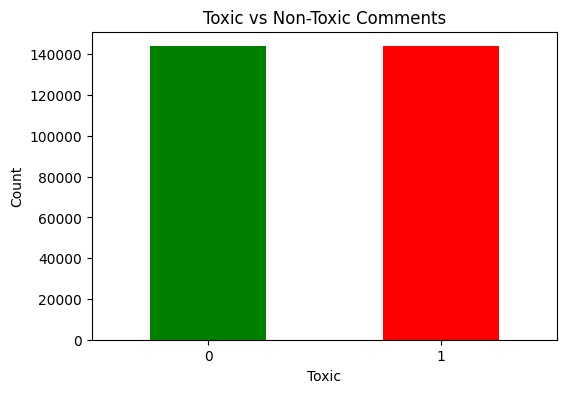

In [28]:
#Plotting the new distribution sample
plt.figure(figsize = (6, 4))
toxic_counts = resampled_df['Toxic'].value_counts()
toxic_counts.plot(kind = 'bar', color = ['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

## **MODELLING**<a id="17"></a>

#### **5.1 Splitting Our Dataset**<a id="18"></a>

In [29]:
from sklearn.model_selection import train_test_split
#Splitting the New Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

#### **5.2 Building Neural Network Model**<a id="19"></a>

In [30]:
#"TensorFlow/keras" is for deep learning models
"""Neural Network Model with very few neurons ensures that the model is ligh-weighted,
and using a dropout of 0.5 helps prevent overfitting."""

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
#Neural Network Model
model = Sequential([
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

2025-07-10 14:15:01.083628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-10 14:15:01.083820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-10 14:15:01.285605: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### **5.3 Training Our Model**<a id="20"></a>

In [31]:
train_model = model.fit(X_train.toarray(), y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.8866 - loss: 0.3055 - val_accuracy: 0.9302 - val_loss: 0.1820
Epoch 2/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9371 - loss: 0.1682 - val_accuracy: 0.9421 - val_loss: 0.1556
Epoch 3/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.9519 - loss: 0.1357 - val_accuracy: 0.9522 - val_loss: 0.1357
Epoch 4/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9625 - loss: 0.1105 - val_accuracy: 0.9586 - val_loss: 0.1191
Epoch 5/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.9697 - loss: 0.0938 - val_accuracy: 0.9630 - val_loss: 0.1087
Epoch 6/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9736 - loss: 0.0822 - val_accuracy: 0.9659 - val_loss: 0.1026
Epoch 7/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9772 - loss: 0.0728 - val_accuracy: 0.9693 - val_loss: 0.0946
Epoch 8/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9788 - loss: 0

#### **5.4 Visualizing Our Model**<a id="21"></a>

##### **5.4.1 Model Accuracy**<a id="22"></a>

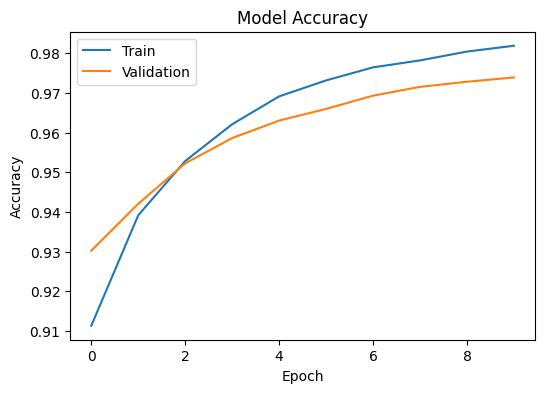

In [32]:
#Training vs Validation Accuracy
plt.figure(figsize = (6, 4))
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

##### **5.4.2 Model Loss**<a id="23"></a>

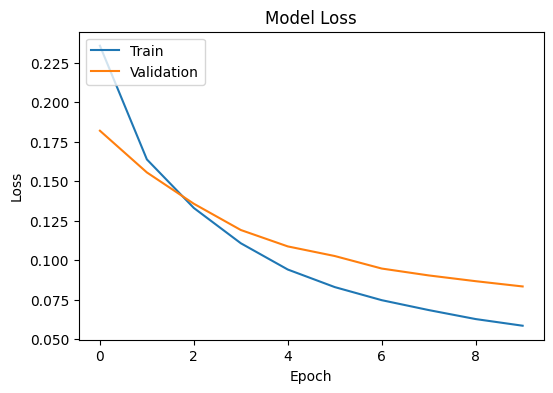

In [33]:
#Training vs Validation Loss
plt.figure(figsize = (6, 4))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

#### **5.5 Model Accuracy Evaluation**<a id="24"></a>

In [34]:
#Evaluating Model Accuracy On Test Data
"""Let's ensure that the model is not overfitting."""

loss, accuracy = model.evaluate(X_test, y_test)
print(f"The Test Accuracy is: {accuracy}")

1799/1799 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9751 - loss: 0.0813
The Test Accuracy is: 0.9745282530784607


In [35]:
#Loss
print(f"The Model Loss is: {loss}")

The Model Loss is: 0.08303982764482498


In [36]:
from sklearn.metrics import classification_report

#Predictions on Test Data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

#Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

1799/1799 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     28665
           1       0.96      0.99      0.97     28889

    accuracy                           0.97     57554
   macro avg       0.97      0.97      0.97     57554
weighted avg       0.97      0.97      0.97     57554



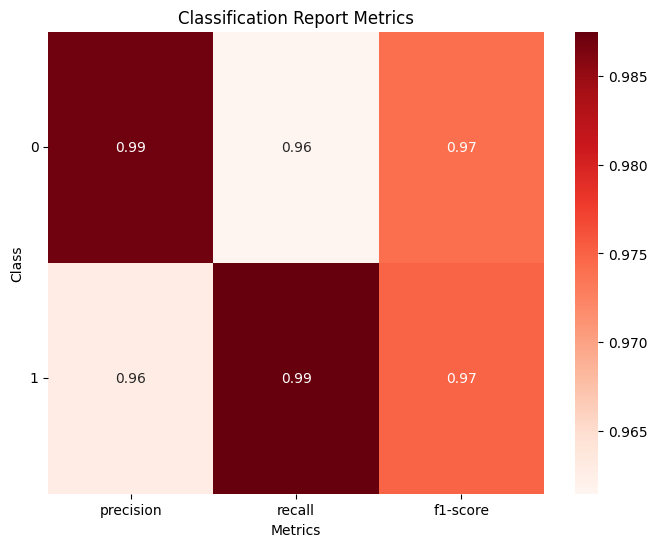

In [37]:
import seaborn as sns

#Predictions on Test Data
#y_pred_prob = model.predict(X_test)
#y_pred = (y_pred_prob > 0.5).astype(int)

#Classification Report
class_report = classification_report(y_test, y_pred, output_dict = True)
class_report_df = pd.DataFrame(class_report).transpose()

#Dropping irrelevant metrics for Visualization
class_metrics = class_report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f')
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.show()

We can see from the diagram above that the model is not overfitting.

#### **5.6 Saving Our Model and Vectorizer**<a id="25"></a>

In [38]:
#Saving the Keras Model
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vector, f)

model.save('toxic_comment_prediction_model.h5')

#### **5.7 Testing Our Saved Model**<a id="26"></a>

In [39]:
#Reusing The Saved Model
import pickle
from tensorflow.keras.models import load_model
#Import TF-IDF Vectorizer for text handling
from sklearn.feature_extraction.text import TfidfVectorizer

#Loading TF-IDF Vectorizer
with open('/kaggle/working/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
    
    
#Loading The Trained Model
loaded_model = load_model('/kaggle/working/toxic_comment_prediction_model.h5')
new_comments = [
    "You're quite a bad person at keeping to time.",
    "This is a very bad service.",
    "You’ve achieved so much!",
    "You are very stupid and mad.",
]

#Processing New Comments using the Loaded TF-IDF Vectorizer
processed_comment = loaded_vectorizer.transform(new_comments)

#Predicting using the Loaded Model
predictions = (loaded_model.predict(processed_comment) > 0.5).astype(int)

#Prediction Result
for comment, prediction in zip(new_comments, predictions):
    print(f"Comment: {comment} | Is Toxic: {bool(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Comment: You're quite a bad person at keeping to time. | Is Toxic: True
Comment: This is a very bad service. | Is Toxic: False
Comment: You’ve achieved so much! | Is Toxic: False
Comment: You are very stupid and mad. | Is Toxic: True


## **REPORTS**<a id="27"></a>

**<h1 align = "center">Toxic Comment Detection (two datasets) - Machine Learning</h1>**


**OBJECTIVE:**
The objective of this project is to combine comments from both youtube and jigsaw datasets, and build a toxic comment detection.


**METHODOLOGY:**
* Load and read the two datasets.
* Select "Comment" and "Toxic" columns from each of the datasets.
* Combine the new DataFrames.
* Process the texts in the "comment" column.
* The dataset is balanced using SMOTE Over-Sampling.
* Build a Neural Networ Model.
* Predict and Evaluate the model.
* Test model on new text data.


**RESULTS:**
* The dataset has 160571 Rows and 2 Columns.
* The comment column is object datatype, while the target column is bool.
* The dataset has 5 duplicate rows.
* The target column has 143884 False and 16684 True values.
* The model accuracy and model loss were found to be 0.97 and loss: 0.0691.


**CONCLUSION:**
I was able to build a toxic comment detection model with 97% accuracy.


**RECOMMENDATIONS:**
In other to eliminate toxic comments online, this model can be integrated into the comment sections of online platforms.